# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**Summary**: This dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> **PatientId**: The unique patient identifier.

> **AppointmentID**: The unique appointment identifier.

> **Gender**: The sex of the patient; "F" for "Female", "M" for Male.

>**ScheduledDay**: The day the patient set up their appointment.

>**AppointmentDay**: The day of the patient's appointment.

>**Age**: The patient's age.

>**Neighborhood**: The location of the hospital.

>**Scholarship**: Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

>**Hypertension, Diabetes, Alcoholism, Handicap**: Patient's health status.

>**SMS_received**: Whether the patient received SMS reminder.

>**No-show**: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



### Question for Analysis
>**1**: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

>**2**: How does the health status of the patients affect their decision to show up or not for their medical appointments?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("No show Appointment.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.shape

(110527, 14)

In [44]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age_group,day_diff
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult,0 days
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,0 days
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adult,0 days
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child,0 days
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult,0 days


In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [10]:
df.AppointmentDay.min()

'2016-04-29T00:00:00Z'

In [11]:
df.AppointmentDay.max()

'2016-06-08T00:00:00Z'

In [12]:
df.duplicated().sum()

0

- The **No-Show Appointment** dataset has 110,527 different observations with 14 unique features.
- The data has no missing values across all features and observations
- No duplicate observations. There are 62,299 patients covered. These patients are located in 81 different locations or neighbourhood.
- Some column names ("Hipertension and Handcap") do not have descriptive names
- The "ScheduledDay" and "AppointmentDay" columns do not have the appropriate feature values and datatype
- The PatientId and AppointmentId columns are in numerical values.
- The Age feature contains value with "-1"

### Data Cleaning

**Converting and cleaning the "PatientId" and "AppointmentId" to "object" datatypes**

In [13]:
df["PatientId"] = df["PatientId"].astype(object)
df["AppointmentID"] = df["AppointmentID"].astype(object)

**Cleaning the "Scheduled Day" and the "Appointment Day" columns and converts to "datetime" datatypes**

In [14]:
# Cleaning the columns "ScheduledDay" and "AppointmentDay", removing out-of-place characters
# and converting to Datetime properties
df["ScheduledDay"] = df["ScheduledDay"].str.split("T", expand=True)[0]
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = df["AppointmentDay"].str.split("T", expand=True)[0]
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

**Correct the feature header names**

In [15]:
# This corrects the column name "Hipertension" to "Hypertension"
df.rename(columns={"Hipertension":"Hypertension", "Handcap":"Handicap"}, inplace=True)

**Drops all observations with age less than "0"**

**Group Age into Age Groups as follows;**
- 0-14 = Child
- 15-24 = Adolescent
- 25-64 = Adult
- 65 and above = Seniors

In [16]:
# Removing observations with age less than 0
df = df[df["Age"] >= 0]

In [17]:
bin = [0, 15, 25, 65, 200]
label = ["Child", "Adolescent", "Adult", "Seniors"]
df["Age_group"] = pd.cut(df["Age"], bins=bin, labels=label, right=False)

**Calculating the day difference and dropping dirty data**

In [18]:
# Calculating the Time difference between the appointment and scheduled days and dropping difference less than 0ms
df["day_diff"] = (df["AppointmentDay"] - df["ScheduledDay"])

df = df[df["day_diff"] >= "0"]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   PatientId       110521 non-null  object         
 1   AppointmentID   110521 non-null  object         
 2   Gender          110521 non-null  object         
 3   ScheduledDay    110521 non-null  datetime64[ns] 
 4   AppointmentDay  110521 non-null  datetime64[ns] 
 5   Age             110521 non-null  int64          
 6   Neighbourhood   110521 non-null  object         
 7   Scholarship     110521 non-null  int64          
 8   Hypertension    110521 non-null  int64          
 9   Diabetes        110521 non-null  int64          
 10  Alcoholism      110521 non-null  int64          
 11  Handicap        110521 non-null  int64          
 12  SMS_received    110521 non-null  int64          
 13  No-show         110521 non-null  object         
 14  Age_group       1105

In [20]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Age_group,day_diff
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Adult,0 days
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,0 days
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Adult,0 days
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child,0 days
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult,0 days


After Data Wrangling, Cleaning and Feature Engineering, there are 110521 observations with 16 features include the "Age Group" and "Day Diff".

<a id='eda'></a>
## Exploratory Data Analysis

**Define a function to plot a barchart taking two(2) inputs for values and plot labels**

In [21]:
# Write a bar_plot function
def bar_plot(data, labels):
    fig, ax = plt.subplots(1, len(data), figsize=(12, 6))       # A subplot with 2 canvas
    for i in range(len(data)):                          # for loop to iterate through the "data" input
        data[i].plot(kind="bar", ax=ax[i], color="red")
        ax[i].set_xlabel("No Show Status")
        ax[i].set_ylabel("{} of Patients".format(labels[i])) # label plots using customized label values
        ax[i].set_title("{} of Patients vs No Show Appointment".format(labels[i]))

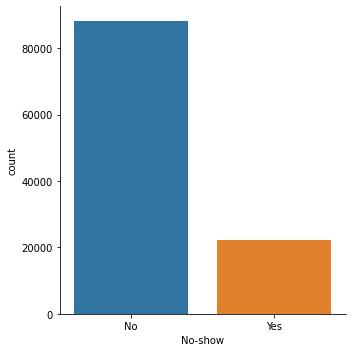

In [35]:
import seaborn as sns

sns.catplot(x='No-show', data=df, kind='count');

In [22]:
# Create lists of labels and data to plot 
label = ["Number", "Percentage"]
value = [df["No-show"].value_counts(), df["No-show"].value_counts(normalize=True)]

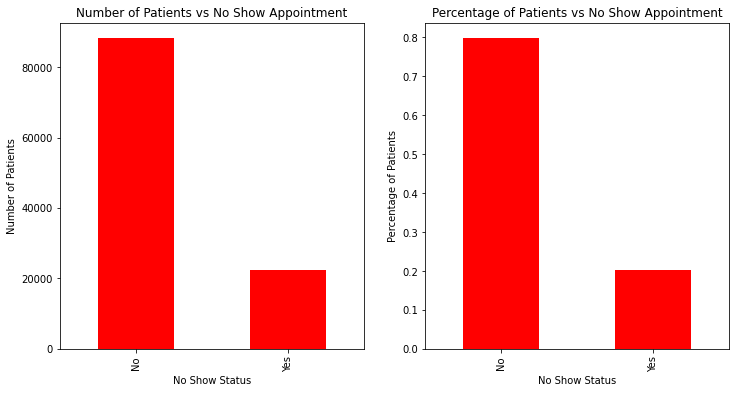

In [ ]:
# Calling function bar_plot
bar_plot(value, label)

The graph above shows the number of patients attending their appointments were 88,207 representing 79.81% of the total appointments while those that missed their appointments were 22,314 representing 20.19%.

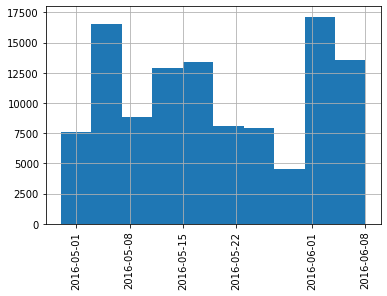

In [24]:
df["AppointmentDay"].hist()
plt.xticks( rotation="vertical");

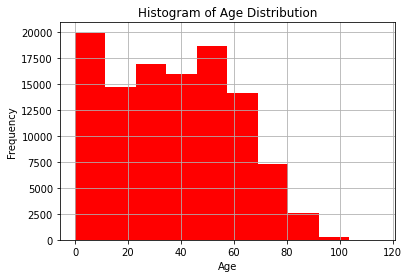

In [25]:
df["Age"].hist(color="red")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age Distribution");

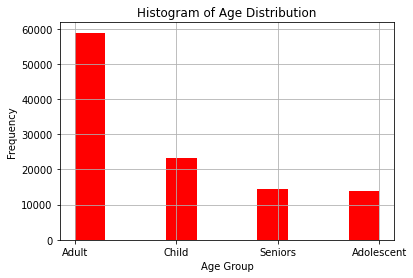

In [26]:
df["Age_group"].hist(color="red")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.title("Histogram of Age Distribution");

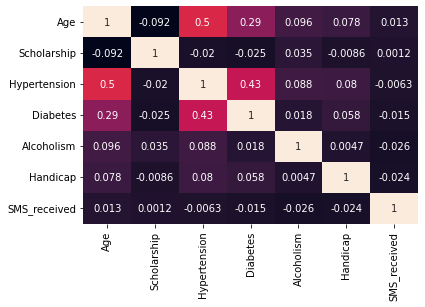

In [27]:
sns.heatmap(df.corr(), cbar=False, annot=True);

The numerical values as shown in the figure do not have a strong correlation.

### Research Question 1 (How does the elapsed day between the appointment day and the schedule day affect if the patient will show up or not?)

In [28]:
df.groupby("No-show")["day_diff"].mean()

No-show
No     8 days 18:06:51.151042434
Yes   15 days 20:03:05.856413014
Name: day_diff, dtype: timedelta64[ns]

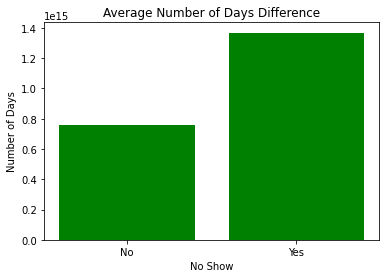

In [29]:
day_diff = df.groupby("No-show")["day_diff"].mean()
plt.bar(day_diff.index, day_diff, color="green")
plt.xlabel("No Show")
plt.ylabel("Number of Days")
plt.title("Average Number of Days Difference");

The average time elapsed between the appointment day and scheduled day;

**No show**: 15 days, 20 hours while for **show**: 8 days, 18 hours

## Research Question 2 (How does the age distribution of patients affect their going for medical appointment?) 

(<seaborn.axisgrid.FacetGrid at 0x23711929310>,)

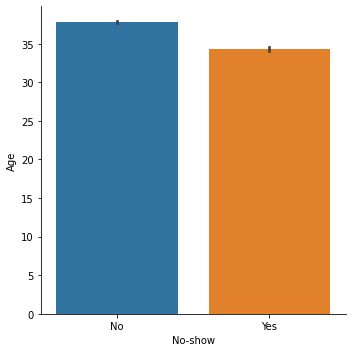

In [49]:
sns.catplot(y='Age', x='No-show', data=df, kind='bar'),

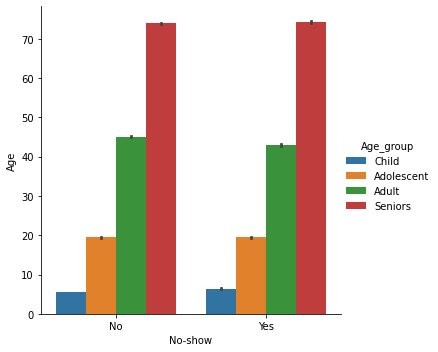

In [47]:
sns.catplot(x='No-show', y='Age', data=df, kind='bar', hue='Age_group');

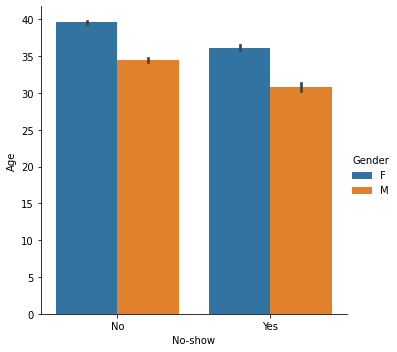

In [48]:
sns.catplot(x='No-show', y='Age', data=df, kind='bar', hue='Gender');

From the above charts and analysis, the age and gender of the patients does not seem to be a factor for showing up of not for the medical appointment.

### Research Question 3  (Does the health status of the patient influence the decision to show up?)

In [30]:
df.groupby(["No-show","Age_group"]).mean()

Age  Scholarship  Hypertension  Diabetes  \
No-show Age_group                                                    
No      Child        5.610114     0.101304      0.000655  0.000764   
        Adolescent  19.469341     0.118147      0.005540  0.004680   
        Adult       45.032263     0.104494      0.228465  0.077566   
        Seniors     73.918564     0.020791      0.588956  0.228942   
Yes     Child        6.432081     0.113096      0.001624  0.001015   
        Adolescent  19.453081     0.135387      0.006218  0.006501   
        Adult       42.998967     0.129443      0.204148  0.071004   
        Seniors     74.220878     0.017025      0.613799  0.258513   

                    Alcoholism  Handicap  SMS_received  
No-show Age_group                                       
No      Child         0.000436  0.006328      0.262888  
        Adolescent    0.004394  0.021299      0.277746  
        Adult         0.049389  0.022906      0.305502  
        Seniors       0.024324  0.048073      0.290903  
Yes     Child         0.001624  0.013198      0.409137  
        Adolescent    0.007066  0.010458      0.466083  
        Adult         0.050435  0.018590      0.452018  
        Seniors       0.025986  0.059588      0.388889

C:\Users\AJIBOLA\AppData\Local\Temp\ipykernel_5388\2665699691.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("No-show")["Hypertension", "Diabetes", "Alcoholism", "Handicap"].mean().plot(kind="bar", figsize=(12, 8))


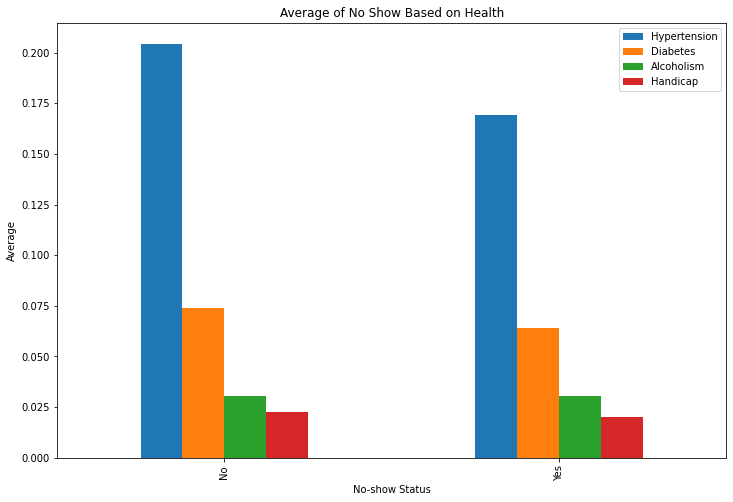

In [31]:
df.groupby("No-show")["Hypertension", "Diabetes", "Alcoholism", "Handicap"].mean().plot(kind="bar", figsize=(12, 8))
plt.ylabel("Average")
plt.xlabel("No-show Status")
plt.title("Average of No Show Based on Health");

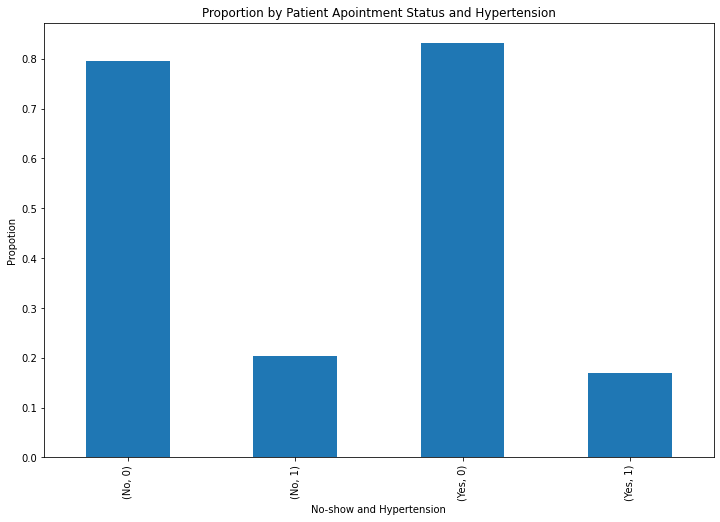

In [32]:
count = df.groupby(["No-show", "Hypertension"]).count()["Neighbourhood"]
total = df.groupby("No-show").count()["Neighbourhood"]
proportions = count/total
proportions.plot(kind="bar", title="Proportion by Patient Apointment Status and Hypertension", figsize=(12, 8))
plt.xlabel("No-show and Hypertension")
plt.ylabel("Propotion");

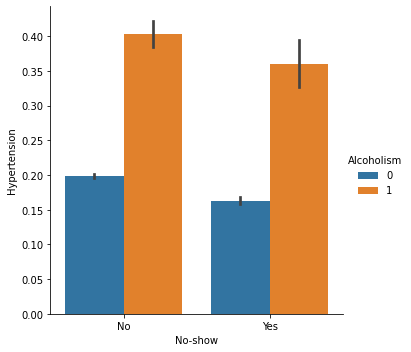

In [58]:
sns.catplot(x='No-show', y='Hypertension', data=df, kind='bar', hue='Alcoholism');

A significant number of patients with medical conditions show up for their doctor's appointment more than those without an underlying medical condition as presented in the two charts above.

In [33]:
df.value_counts(["Neighbourhood", "No-show"], sort=False)[0:81]

Neighbourhood      No-show
AEROPORTO          No            7
                   Yes           1
ANDORINHAS         No         1741
                   Yes         521
ANTÔNIO HONÓRIO    No          221
                              ... 
JARDIM CAMBURI     Yes        1465
JARDIM DA PENHA    No         3246
                   Yes         631
JESUS DE NAZARETH  No         2157
                   Yes         696
Length: 81, dtype: int64

<a id='conclusions'></a>
## Conclusions

> **1**: The analysis showed that the longer the number of days between the day of scheduling the appointment and the appointment day is, the less likely it is for the patient to show up for the appointment.

> **2**: The report shows that patients with underlying health challenges show up more often for their medical appointments.

> **3**: This analysis did not consider neighbourhood nor the distance to a medical facility.

### Limitation
>**1**: The data gotten has a "sampling bias" with only about 20% of the entire population on the positive class i.e. having a "No-show" value of "Yes" while the "No" value has almost 80% of the population.

>**2**: This sampling bias has resulted in a class imbalance between the the "No-show" feature.